In [151]:





import datetime
import pytz
import pandas as pd
import MetaTrader5 as mt5
import matplotlib.pyplot as plt
import numpy as np
import pandas_ta as ta







In [152]:





# 30 min time frame
frameM30 = mt5.TIMEFRAME_M30

#1 min time frame
frameM1 = mt5.TIMEFRAME_M1

# 1 hour time frame
frameH1 = mt5.TIMEFRAME_H1





In [153]:





def getAssetList(assetSet = None):
    assetList = []
    if assetSet == 1:
        assetList = ['EURUSD', 'USDCHF']
    return assetList

        





In [154]:







## Defining the getQuotes method

def getQuotes(mt5TimeFrame, year = 2020, month = 1, day = 1, asset ='EURUSD'):
    
    ## Establishing the connection to MetaTrader 5
    if not mt5.initialize():
        print(f'MT5 initialization failed: Error code = {mt5.last_error}')
        quit()

    # Current time
    currentTime = datetime.datetime.now()

    # Defining the timezone and created utcFrom and utcTo dates
    timeZone = pytz.timezone('Asia/Kolkata')
    utcFrom = datetime.datetime(year, month, day, tzinfo = timeZone)
    utcTo = datetime.datetime(currentTime.year, currentTime.month, currentTime.day, tzinfo = timeZone)
    
    # Retrieving the data and returning it after converting it to pd dataframe
    return pd.DataFrame(mt5.copy_rates_range(asset, mt5TimeFrame, utcFrom, utcTo))







In [155]:



df = getQuotes(frameM30, 2023, 8)
df





,time,open,high,low,close,tick_volume,spread,real_volume
0,1690828200,1.10258,1.10293,1.10176,1.10179,2532,8,0
1,1690830000,1.10180,1.10199,1.10107,1.10114,1748,8,0
2,1690831800,1.10114,1.10127,1.10036,1.10065,1719,8,0
3,1690833600,1.10065,1.10110,1.10044,1.10086,1311,8,0
4,1690835400,1.10086,1.10104,1.10037,1.10044,1157,8,0
...,...,...,...,...,...,...,...,...
811,1692806400,1.08039,1.08291,1.08031,1.08279,4893,8,0
812,1692808200,1.08279,1.08444,1.08251,1.08374,9913,8,0
813,1692810000,1.08373,1.08536,1.08344,1.08493,7991,8,0
814,1692811800,1.08494,1.08530,1.08408,1.08452,4819,8,0


In [156]:


def trendIntensityIndex(df, lookup = 10):
    df['sma'] = ta.sma(df['close'], length=lookup)
    df['col1'] = np.where((df['close'] > df['sma']), (df['close'] - df['sma']), 0)
    df['col2'] = np.where((df['close'] < df['sma']), (df['sma'] - df['close']), 0)
    df['rollingTotalUp'] = df['col1'].rolling(window=lookup).sum()
    df['rollingTotalDown'] = df['col2'].rolling(window=lookup).sum()
    df['tii'] = ((df['rollingTotalUp']) / (df['rollingTotalUp'] + df['rollingTotalDown'])) * 100
    return df





In [157]:





lookBackPeriod = 10

df = trendIntensityIndex(df, lookBackPeriod)

df = df.dropna()

df




,time,open,high,low,close,tick_volume,spread,real_volume,sma,col1,col2,rollingTotalUp,rollingTotalDown,tii
9,1690844400,1.09950,1.09951,1.09931,1.09942,524,8,0,1.100369,0.000000,0.000949,0.000000,0.000949,0.000000
10,1690846200,1.09942,1.09972,1.09937,1.09959,380,8,0,1.100149,0.000000,0.000559,0.000000,0.001508,0.000000
11,1690848000,1.09950,1.09950,1.09930,1.09946,126,31,0,1.099981,0.000000,0.000521,0.000000,0.002029,0.000000
12,1690849800,1.09947,1.09965,1.09945,1.09960,473,38,0,1.099876,0.000000,0.000276,0.000000,0.002305,0.000000
13,1690851600,1.09966,1.10026,1.09954,1.10013,591,8,0,1.099803,0.000327,0.000000,0.000327,0.002305,12.424012
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
811,1692806400,1.08039,1.08291,1.08031,1.08279,4893,8,0,1.081184,0.001606,0.000000,0.001606,0.017312,8.489269
812,1692808200,1.08279,1.08444,1.08251,1.08374,9913,8,0,1.081370,0.002370,0.000000,0.003976,0.014349,21.697135
813,1692810000,1.08373,1.08536,1.08344,1.08493,7991,8,0,1.081691,0.003239,0.000000,0.007215,0.011610,38.326693
814,1692811800,1.08494,1.08530,1.08408,1.08452,4819,8,0,1.082048,0.002472,0.000000,0.009687,0.008608,52.948893


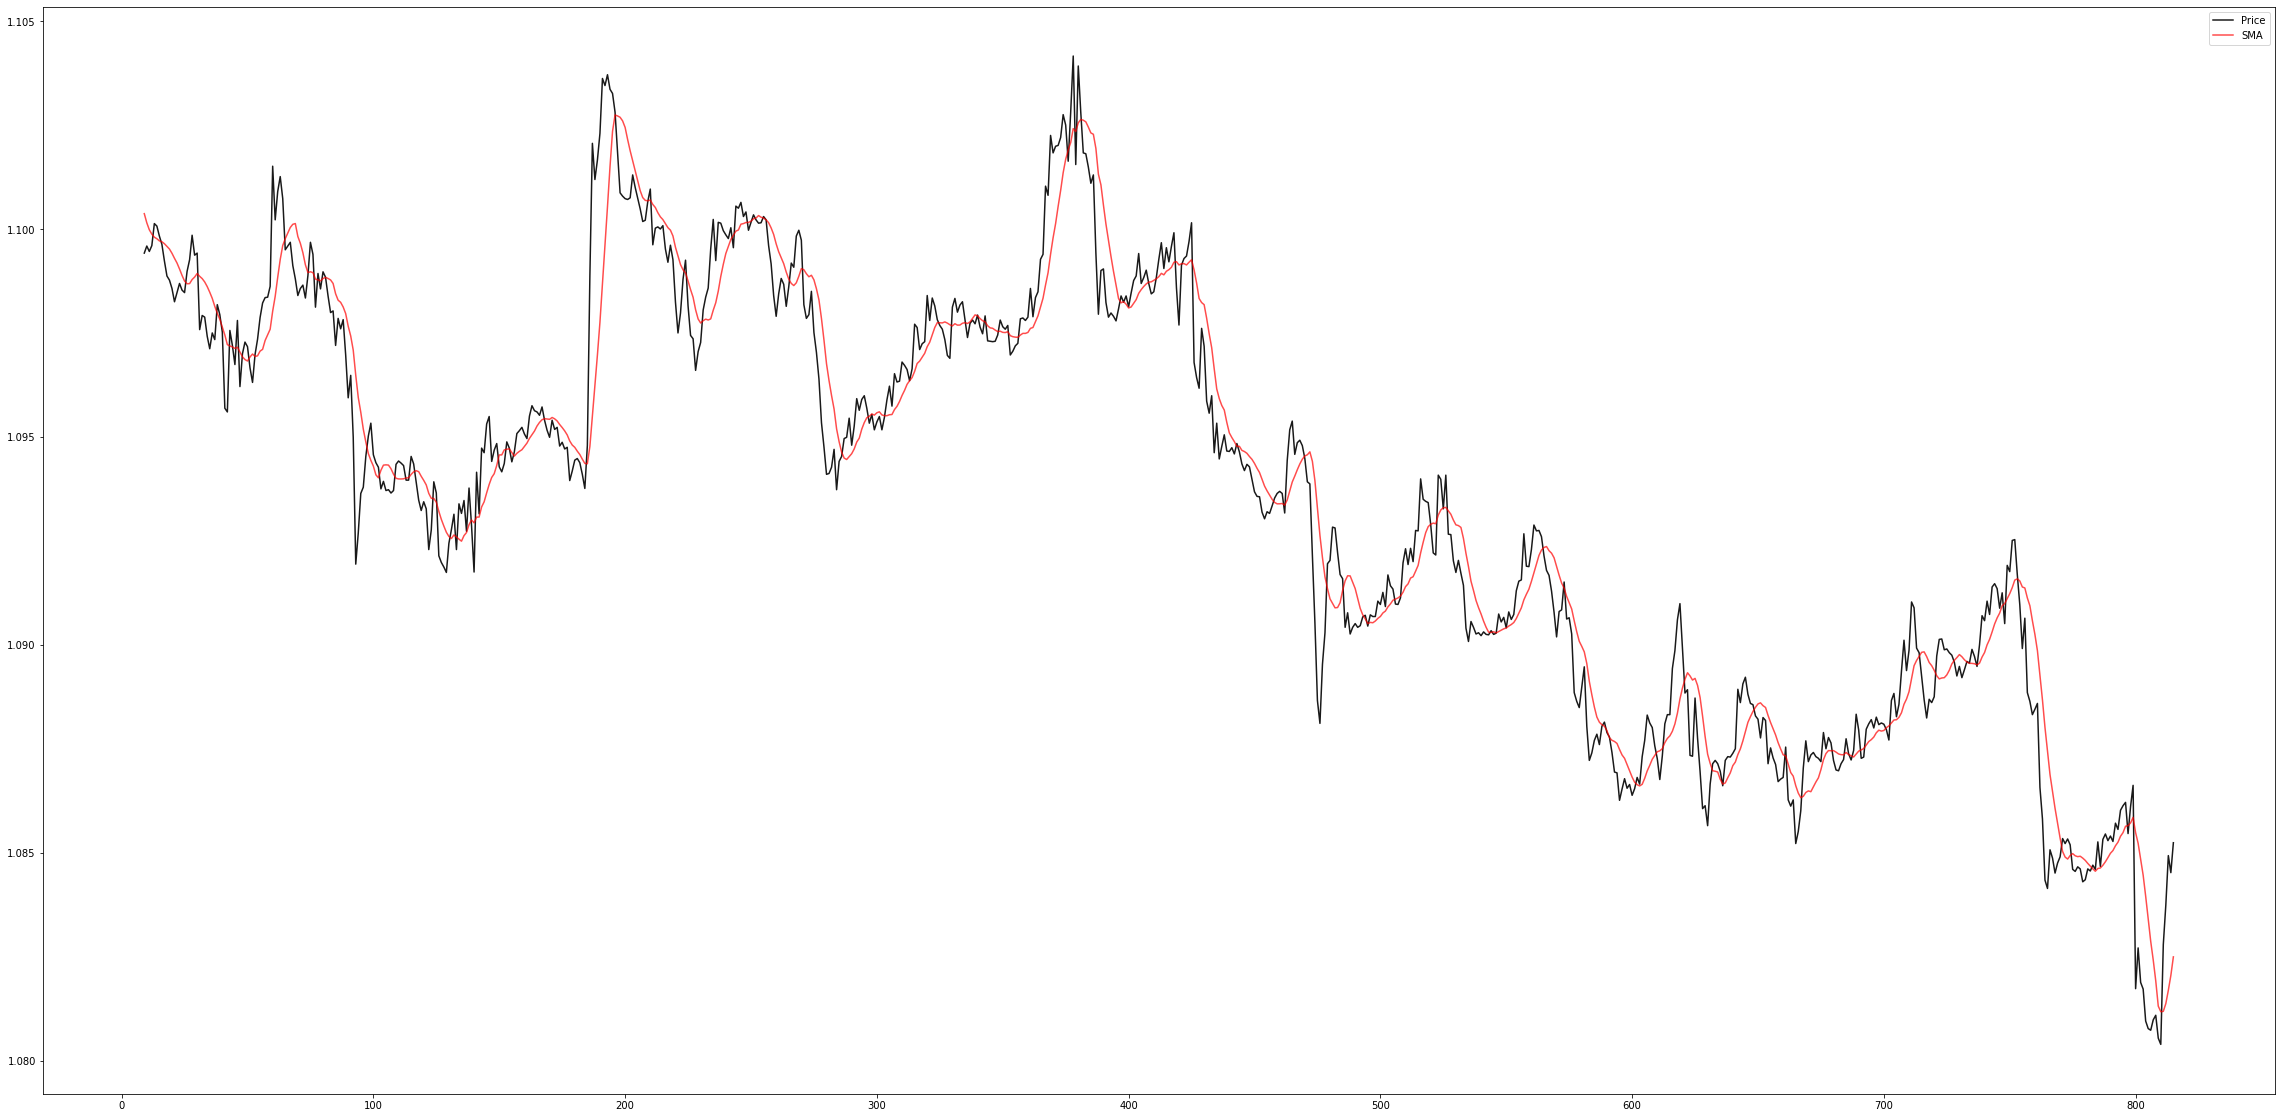

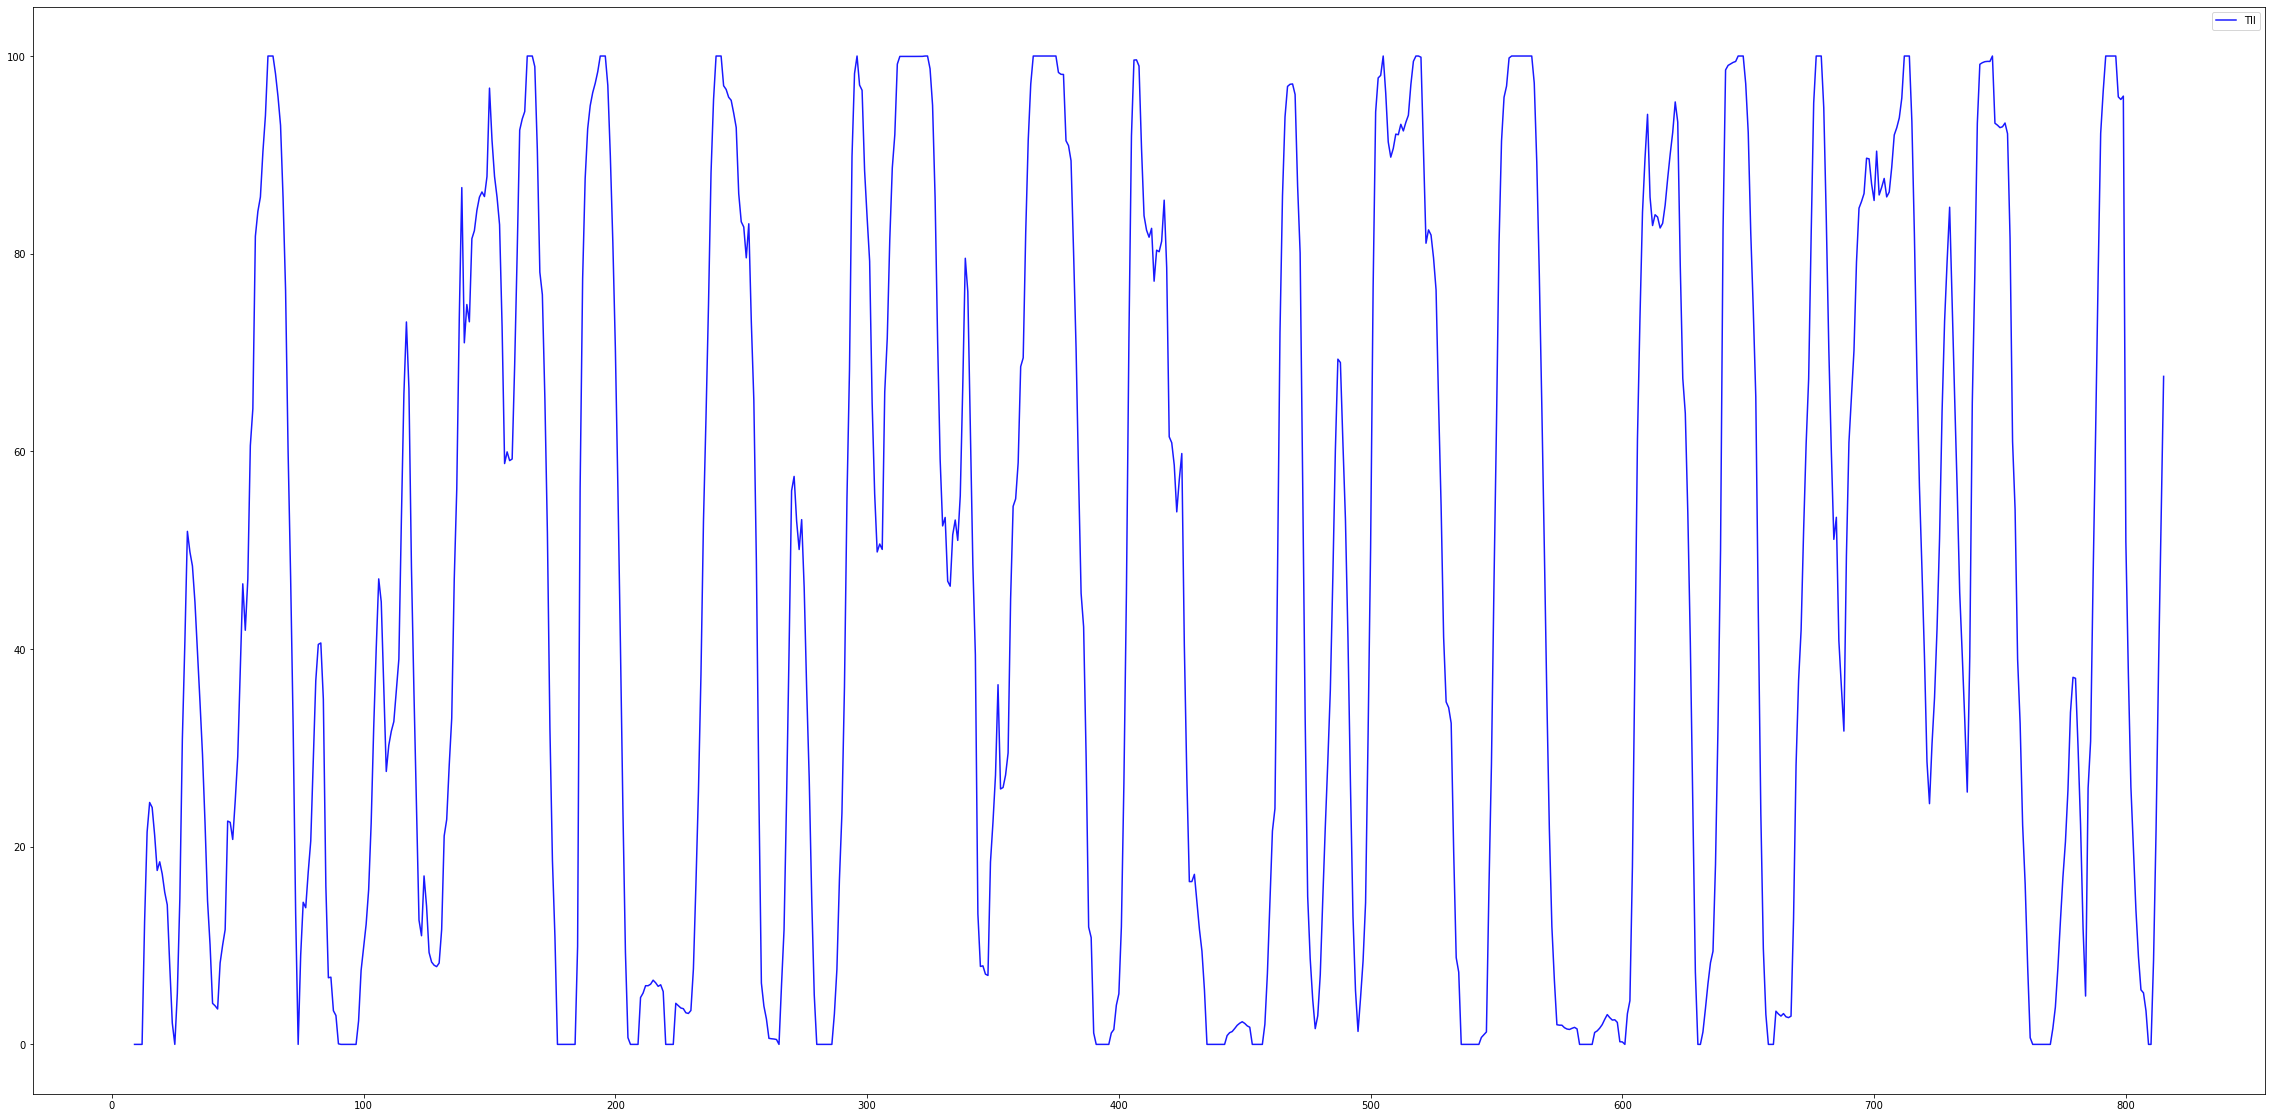

In [158]:






## Increasing the figure size
plt.figure(figsize = (40, 20))

## Plotting the Asset Price.
plt.plot(df['close'], label='Price', c='black', alpha=0.9)

## Plotting the SMAs
plt.plot(df['sma'], label='SMA', c='red', alpha=0.7)


# Showing the plot
plt.legend()
plt.show()



## Increasing the figure size
plt.figure(figsize = (40, 20))

## Plotting the tii (Trend Intensity Index)
plt.plot(df['tii'], label='TII', c='blue', alpha=0.9)

# Showing the plot
plt.legend()
plt.show()



